In [1]:
import matplotlib.pyplot as plt
#import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
import weather

In [3]:
weather.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
cities = weather.cities
cities

['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']

In [5]:
%%time
df = weather.load_resampled_data()

Wall time: 116 ms


In [6]:
df.head()

Aalborg                                    Aarhus  \
                         Temp     Pressure WindSpeed     WindDir   Temp   
DateTime                                                                  
1980-03-01 11:00:00  5.000000  1007.766667      10.2  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000      10.3  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667       9.7  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333      11.1  283.333333    5.0   
1980-03-01 15:00:00  4.000000  1008.200000      11.3  280.000000    5.0   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556      NaN   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   
1980-03-01 15:00:00  12.577778  302.777778  6.000000  1011.500000  12.400000   

                             Roskilde                                  
                    WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                               
1980-03-01 11:00:00   290.0  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00   290.0  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00   290.0  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00   290.0  5.833333      NaN  12.300000  270.000000  
1980-03-01 15:00:00   290.0  4.833333      NaN  12.300000  270.000000

### Missing Data

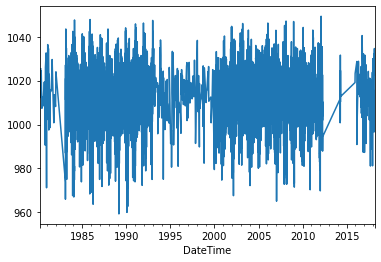

In [7]:
df['Esbjerg']['Pressure'].plot()

In [8]:
df.values.shape

(333109, 20)

#### Removing the two signals that have missing data

In [9]:
df.drop(('Esbjerg', 'Pressure'), axis=1, inplace=True)
df.drop(('Roskilde', 'Pressure'), axis=1, inplace=True)

In [10]:
df.values.shape

(333109, 18)

In [11]:
df.head(5)

Aalborg                                    Aarhus  \
                         Temp     Pressure WindSpeed     WindDir   Temp   
DateTime                                                                  
1980-03-01 11:00:00  5.000000  1007.766667      10.2  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000      10.3  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667       9.7  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333      11.1  283.333333    5.0   
1980-03-01 15:00:00  4.000000  1008.200000      11.3  280.000000    5.0   

                                                     Esbjerg             \
                        Pressure WindSpeed WindDir      Temp  WindSpeed   
DateTime                                                                  
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333  12.383333   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333  12.883333   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889  13.244444   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222  12.911111   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556  12.577778   

                                   Odense                                  \
                        WindDir      Temp     Pressure  WindSpeed WindDir   
DateTime                                                                    
1980-03-01 11:00:00  310.000000  6.142857  1011.066667  12.585714   290.0   
1980-03-01 12:00:00  310.000000  7.000000  1011.200000  11.300000   290.0   
1980-03-01 13:00:00  309.444444  7.000000  1011.300000  12.118182   290.0   
1980-03-01 14:00:00  306.111111  6.857143  1011.400000  12.742857   290.0   
1980-03-01 15:00:00  302.777778  6.000000  1011.500000  12.400000   290.0   

                     Roskilde                         
                         Temp  WindSpeed     WindDir  
DateTime                                              
1980-03-01 11:00:00  5.000000  11.466667  280.000000  
1980-03-01 12:00:00  5.000000  12.466667  280.000000  
1980-03-01 13:00:00  5.166667  13.133333  278.333333  
1980-03-01 14:00:00  5.833333  12.300000  270.000000  
1980-03-01 15:00:00  4.833333  12.300000  270.000000

### Data Errors

In [12]:
import seaborn as sns

There are some errors in this data. As shown in the plot below, the temperature in the city of Odense suddenly jumped to almost 50 degrees C. But the highest temperature ever measured in Denmark was only 36.4 degrees Celcius and the lowest was -31.2 C. So this is clearly a data error

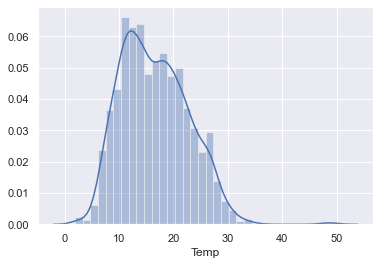

In [13]:
sns.set()
#sns.despine()
sns.distplot(df['Odense']['Temp']['2006-05':'2006-07'])

In [14]:
import plotly.graph_objects as go

In [15]:
df['Odense']['Temp']['2006-05':'2006-07']

DateTime
2006-05-01 00:00:00     6.4
2006-05-01 01:00:00     5.2
2006-05-01 02:00:00     3.7
2006-05-01 03:00:00     3.0
2006-05-01 04:00:00     2.8
                       ... 
2006-07-31 19:00:00    20.9
2006-07-31 20:00:00    19.6
2006-07-31 21:00:00    18.5
2006-07-31 22:00:00    17.8
2006-07-31 23:00:00    17.1
Freq: H, Name: Temp, Length: 2208, dtype: float64

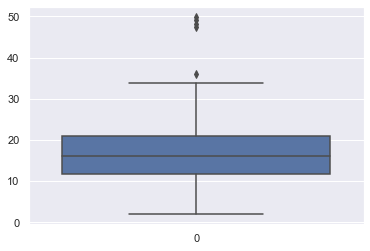

In [16]:
sns.boxplot(data=df['Odense']['Temp']['2006-05':'2006-07'], palette="deep")

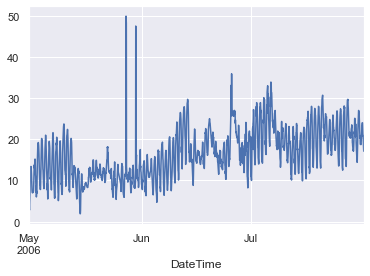

In [17]:
df['Odense']['Temp']['2006-05':'2006-07'].plot()

This can also be confirmed to be an error by considering the temperatures in some of the other cities in Denmark for that period, which was only around 10 degrees. Because the country is so small, it is not possible for one city in Denmark to have 50 degrees while another city only has 10 degrees.

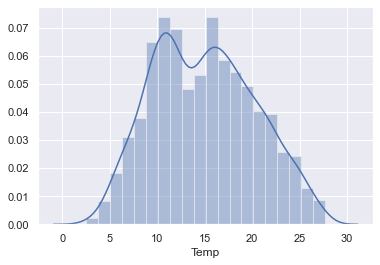

In [18]:
sns.distplot(df['Aarhus']['Temp']['2006-05':'2006-07'])

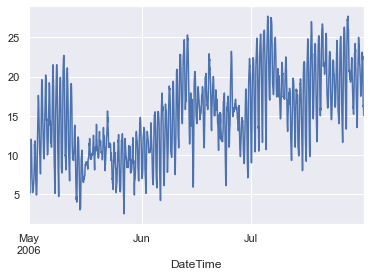

In [19]:
df['Aarhus']['Temp']['2006-05':'2006-07'].plot()

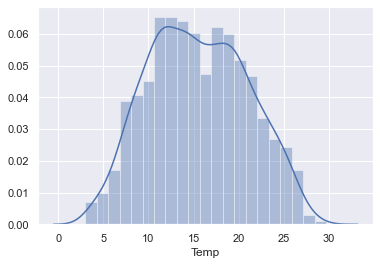

In [20]:
sns.distplot(df['Roskilde']['Temp']['2006-05':'2006-07'])

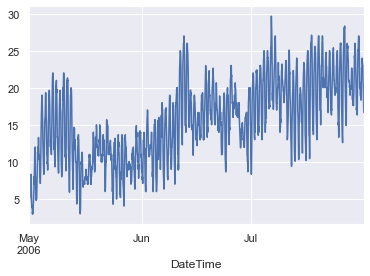

In [21]:
df['Roskilde']['Temp']['2006-05':'2006-07'].plot()

In [22]:
df.index.dayofyear

Int64Index([61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
            ...
            60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
           dtype='int64', name='DateTime', length=333109)

### Add Data

In [23]:
df['Various', 'Day'] = df.index.dayofyear
df['Various', 'Hour'] = df.index.hour

In [24]:
df.head(5)

Aalborg                                    Aarhus  \
                         Temp     Pressure WindSpeed     WindDir   Temp   
DateTime                                                                  
1980-03-01 11:00:00  5.000000  1007.766667      10.2  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000      10.3  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667       9.7  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333      11.1  283.333333    5.0   
1980-03-01 15:00:00  4.000000  1008.200000      11.3  280.000000    5.0   

                                                     Esbjerg             \
                        Pressure WindSpeed WindDir      Temp  WindSpeed   
DateTime                                                                  
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333  12.383333   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333  12.883333   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889  13.244444   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222  12.911111   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556  12.577778   

                                   Odense                                  \
                        WindDir      Temp     Pressure  WindSpeed WindDir   
DateTime                                                                    
1980-03-01 11:00:00  310.000000  6.142857  1011.066667  12.585714   290.0   
1980-03-01 12:00:00  310.000000  7.000000  1011.200000  11.300000   290.0   
1980-03-01 13:00:00  309.444444  7.000000  1011.300000  12.118182   290.0   
1980-03-01 14:00:00  306.111111  6.857143  1011.400000  12.742857   290.0   
1980-03-01 15:00:00  302.777778  6.000000  1011.500000  12.400000   290.0   

                     Roskilde                        Various       
                         Temp  WindSpeed     WindDir     Day Hour  
DateTime                                                           
1980-03-01 11:00:00  5.000000  11.466667  280.000000      61   11  
1980-03-01 12:00:00  5.000000  12.466667  280.000000      61   12  
1980-03-01 13:00:00  5.166667  13.133333  278.333333      61   13  
1980-03-01 14:00:00  5.833333  12.300000  270.000000      61   14  
1980-03-01 15:00:00  4.833333  12.300000  270.000000      61   15

### Target Data for Prediction

In [25]:
target_city = 'Odense'
target_names = 'Temp WindSpeed Pressure'.split()

The following is the number of time-steps that we will shift the target-data. Our data-set is resampled to have an observation for each hour, so there are 24 observations for 24 hours.

If we want to predict the weather 24 hours into the future, we shift the data 24 time-steps. If we want to predict the weather 7 days into the future, we shift the data 7 * 24 time-steps.

In [26]:
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.

In [27]:
df_targets = df[target_city][target_names].shift(-shift_steps)

In [28]:
df[target_city][target_names].head(40)

,Temp,WindSpeed,Pressure
DateTime,,,
1980-03-01 11:00:00,6.142857,12.585714,1011.066667
1980-03-01 12:00:00,7.000000,11.300000,1011.200000
1980-03-01 13:00:00,7.000000,12.118182,1011.300000
1980-03-01 14:00:00,6.857143,12.742857,1011.400000
1980-03-01 15:00:00,6.000000,12.400000,1011.500000
1980-03-01 16:00:00,4.909091,12.618182,1011.688889
1980-03-01 17:00:00,3.953488,12.646512,1011.877778
1980-03-01 18:00:00,3.674419,11.725581,1012.066667
1980-03-01 19:00:00,3.395349,10.804651,1012.255556


In [29]:
df_targets

,Temp,WindSpeed,Pressure
DateTime,,,
1980-03-01 11:00:00,2.000000,6.828571,1005.833333
1980-03-01 12:00:00,2.000000,8.200000,1005.200000
1980-03-01 13:00:00,0.166667,9.216667,1004.766667
1980-03-01 14:00:00,1.000000,11.885714,1004.333333
1980-03-01 15:00:00,1.000000,12.400000,1003.900000
...,...,...,...
2018-03-01 19:00:00,NaN,NaN,NaN
2018-03-01 20:00:00,NaN,NaN,NaN
2018-03-01 21:00:00,NaN,NaN,NaN


### NumPy Arrays

In [30]:
x_data = df.values[0:-shift_steps]
print(type(x_data))
print("Shape: {}".format(x_data.shape))

<class 'numpy.ndarray'>
Shape: (333085, 20)


Output-signals or target-signals

In [31]:
y_data = df_targets.values[:-shift_steps]
print(type(y_data))
print("Shape: {}".format(y_data.shape))

<class 'numpy.ndarray'>
Shape: (333085, 3)


In [32]:
data_size = len(x_data)

In [33]:
train_test_ratio = 0.8

In [34]:
train_size = int(train_test_ratio * data_size)
train_size

266468

In [35]:
test_size = data_size - train_size

In [36]:
x_train = x_data[0:train_size]
x_test = x_data[train_size:]
len(x_train) + len(x_test)

333085

In [37]:
y_train = y_data[0:train_size]
y_test = y_data[train_size:]
len(y_train) + len(y_test)

333085

Number of input-signals

In [38]:
num_x_signals = x_data.shape[1]
num_x_signals

20

Number of output-signals

In [39]:
num_y_signals = y_data.shape[1]
num_y_signals

3

### Scaled Data

The Recurrent Neural Network cells require the data be scaled. We use the MinMaxScaler() method from Scikit-learn to perform data scaling from 0 to 1. Without scaling our data ranges from -27 to 1050.8

In [40]:
print("Min X train: {}".format(np.min(x_train)))
print("Max X train: {}".format(np.max(x_train)))

Min X train: -27.0
Max X train: 1050.8


In [41]:
x_scaler = MinMaxScaler()
scaled_x_train = x_scaler.fit_transform(x_train)
print("Min scaled X train: {}".format(np.min(scaled_x_train)))
print("Max scaled X train: {}".format(np.max(scaled_x_train)))

Min scaled X train: 0.0
Max scaled X train: 1.0000000000000002


In [42]:
print("Min Y train: {}".format(np.min(y_train)))
print("Max Y train: {}".format(np.max(y_train)))

Min Y train: -21.0
Max Y train: 1048.0


In [43]:
y_scaler = MinMaxScaler()
scaled_y_train = y_scaler.fit_transform(y_train)
print("Min scaled Y train: {}".format(np.min(scaled_y_train)))
print("Max scaled Y train: {}".format(np.max(scaled_y_train)))

Min scaled Y train: 0.0
Max scaled Y train: 1.0


#### Scaling the test data! 

In [44]:
scaled_x_test = x_scaler.transform(x_test)
scaled_y_test = y_scaler.transform(y_test)

In [45]:
print(scaled_x_train.shape)
print(scaled_y_train.shape)

(266468, 20)
(266468, 3)


## Data Generator

In [46]:
def batch_generator(batch_size, seq_length):
    """
    Function for creating random batches of training data
    """
    while True:
        # New array for the batch of input signals
        x_shape = (batch_size, seq_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        
        # New array for the batch of output signals
        y_shape = (batch_size, seq_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        
        for i in range(batch_size):
            idx = np.random.randint(train_size - seq_length)
            x_batch[i] = scaled_x_train[idx:idx+seq_length]
            y_batch[i] = scaled_y_train[idx:idx+seq_length]
            
        yield (x_batch, y_batch)

In [47]:
from src.config import config_info as config

In [48]:
batch_size = config['batch_size']
seq_length = config['sequence_length']
features = config['features']
input_size = config['n_input']

In [49]:
generator = batch_generator(batch_size=256, seq_length=seq_length)

In [50]:
X_batch, y_batch = next(generator)

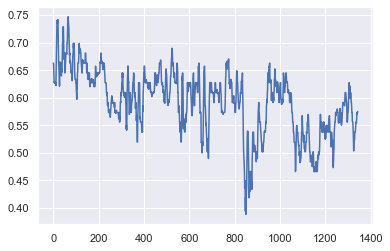

In [51]:
first_sequence = 0
first_signal = 0
seq_x = X_batch[first_sequence, :, first_signal]
plt.plot(seq_x)

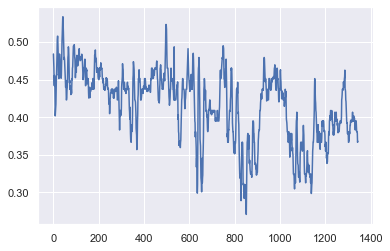

In [52]:
seq_y = y_batch[first_sequence, :, first_signal]
plt.plot(seq_y)

In [53]:
scaled_x_test.shape

(66617, 20)

In [54]:
vscaled_x_test = np.expand_dims(scaled_x_test, axis=0)
vscaled_x_test.shape

(1, 66617, 20)

### Create the Recurrent Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

C:\Users\Ekele\Anaconda3\envs\tensorflow1.X\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Ekele\Anaconda3\envs\tensorflow1.X\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Ekele\Anaconda3\envs\tensorflow1.X\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Ekele\Anaconda3\envs\tensorflow1.X\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a fu

In [56]:
warmup_steps = 50

def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

In [57]:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
#from skopt.plots import plot_histogram, plot_objective_2D
from skopt.utils import use_named_args

In [58]:
dim_learning_rate = Real(low=1e-6, high=1e-2, prior='log-uniform',
                         name='learning_rate')

dim_activation = Categorical(categories=['relu', 'sigmoid'],
                             name='activation')

In [59]:
dimensions = [dim_learning_rate,
              dim_activation]

In [60]:
path_best_model = '19_best_model.h5'
best_accuracy = 0.0

In [61]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(train_size - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = scaled_x_train[idx:idx+sequence_length]
            y_batch[i] = scaled_y_train[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [62]:
batch_size = 128
seq_length = 24 * 7 * 8
generator = batch_generator(batch_size=batch_size,
                            sequence_length=seq_length)

In [63]:
validation_data = (np.expand_dims(scaled_x_test, axis=0),
                   np.expand_dims(scaled_y_test, axis=0))

### Create the Recurrent Neural Network

model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals)))
model.add(Dense(num_y_signals, activation='tanh'))

In [64]:
warmup_steps = 50

def loss_mse_warmup(y_true, y_pred):
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
    
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

### Compile model

In [65]:
def create_model():
    
    model = Sequential()
    model.add(GRU(units=512,
                  return_sequences=True,
                  input_shape=(None, num_x_signals)))
    model.add(Dense(num_y_signals, activation='tanh'))
    
    optimizer = RMSprop(lr=1e-3)
    model.compile(loss=loss_mse_warmup, optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [66]:
model = create_model()
model.summary

Instructions for updating:
Colocations handled automatically by placer.


<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E7B7239CC0>>

### Callback Functions

In [67]:
path_checkpoint = 'model/23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

### Training

In [68]:
%%time
model.fit(x=generator,
          epochs=20,
          steps_per_epoch=100,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/20
1/1 [==============================] - 18s 18s/sample - loss: 0.0040 - acc: 0.9219

Epoch 00001: val_loss improved from inf to 0.00399, saving model to model/23_checkpoint.keras
100/100 [==============================] - 404s 4s/step - loss: 0.0167 - acc: 0.8626 - val_loss: 0.0040 - val_acc: 0.9219
Epoch 2/20
1/1 [==============================] - 16s 16s/sample - loss: 0.0031 - acc: 0.9217

Epoch 00002: val_loss improved from 0.00399 to 0.00314, saving model to model/23_checkpoint.keras
100/100 [==============================] - 385s 4s/step - loss: 0.0049 - acc: 0.8986 - val_loss: 0.0031 - val_acc: 0.9217
Epoch 3/20
1/1 [==============================] - 16s 16s/sample - loss: 0.0033 - acc: 0.9242

Epoch 00003: val_loss did not improve from 0.00314

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 364s 4s/step - loss: 0.0041 - acc: 0.9047 - val_loss: 0.0033 - val_acc: 0.9242
Epoch 4/20
1/1 [========

In [69]:
result = model.evaluate(x=np.expand_dims(scaled_x_test, axis=0),
                        y=np.expand_dims(scaled_y_test, axis=0))

1/1 [==============================] - 22s 22s/sample - loss: 0.0023 - acc: 0.9233


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def plot_comparison(start_idx, length=100, train=True):
    if train:
        X = scaled_x_train
        y_true = y_train
    else:
        X = scaled_x_test
        y_true = y_test
        
    last_idx = start_idx + length
    X = X[start_idx:last_idx]
    y_true = y_true[start_idx:last_idx]
    
    X = np.expand_dims(X, axis=0)
    y_pred = model.predict(X)
    
    rescaled_y_pred = y_scaler.inverse_transform(y_pred[0])
    
    for signal in range(len(target_names)):
        signal_pred = rescaled_y_pred[:, signal]
        signal_true = y_true[:, signal]
        plt.figure(figsize=(15,5))

        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

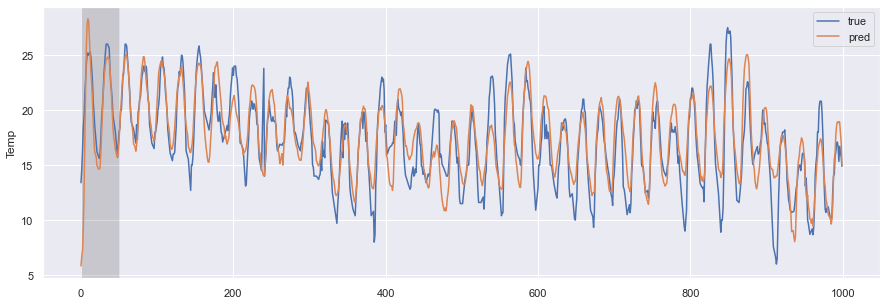

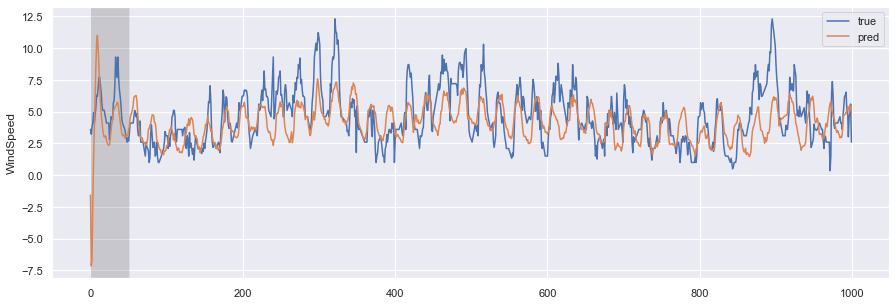

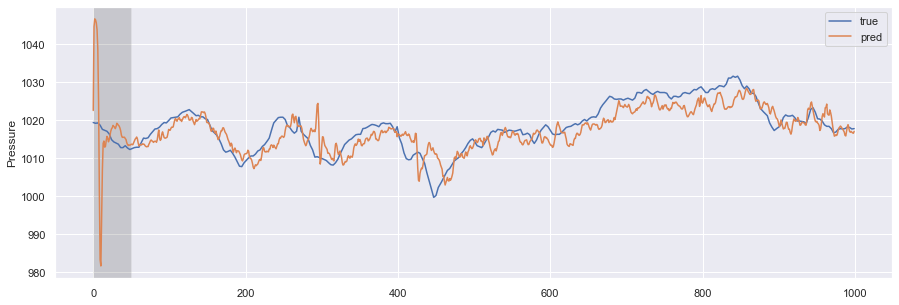

In [72]:
plot_comparison(start_idx=100000, length=1000, train=True) 

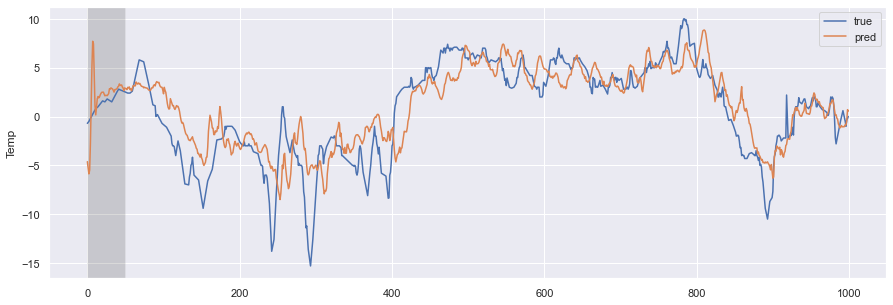

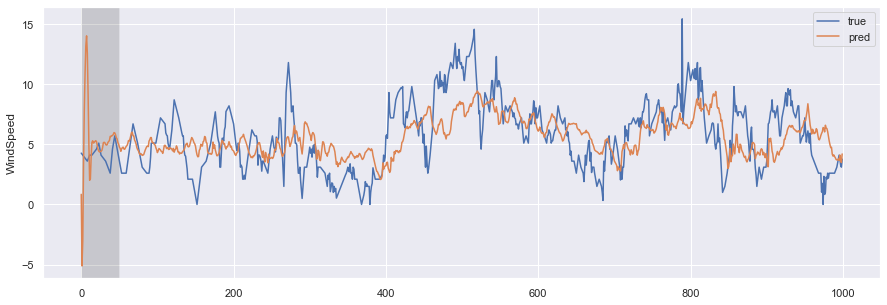

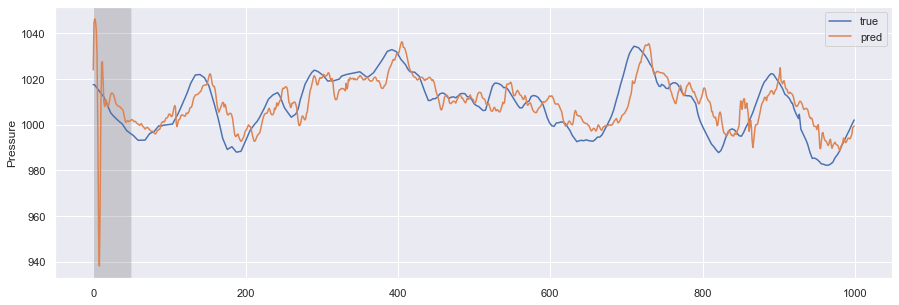

In [73]:
plot_comparison(start_idx=200000, length=1000, train=True)

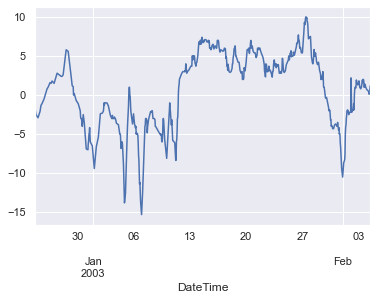

In [74]:
df['Odense']['Temp'][200000:200000+1000].plot()

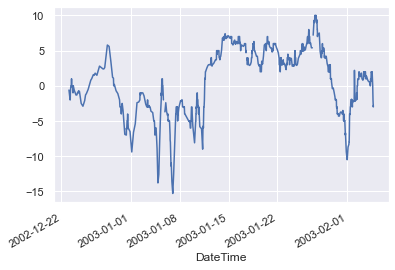

In [75]:
df_org = weather.load_original_data()
df_org.xs('Odense')['Temp']['2002-12-23':'2003-02-04'].plot()

### Example from Test-set

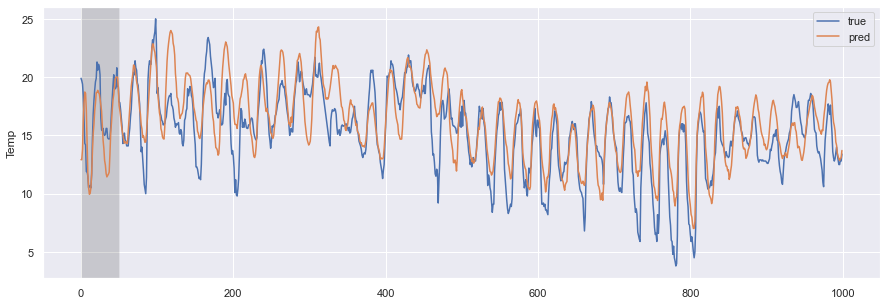

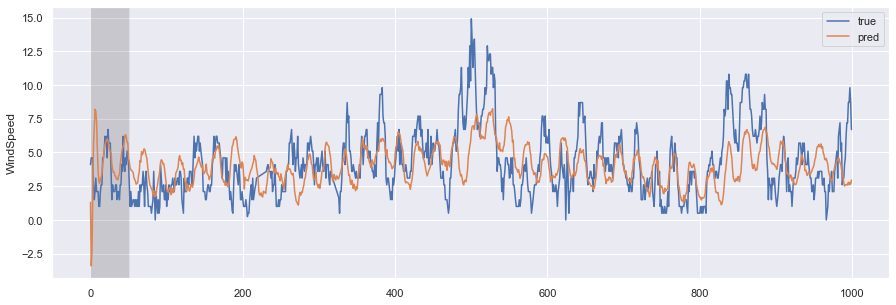

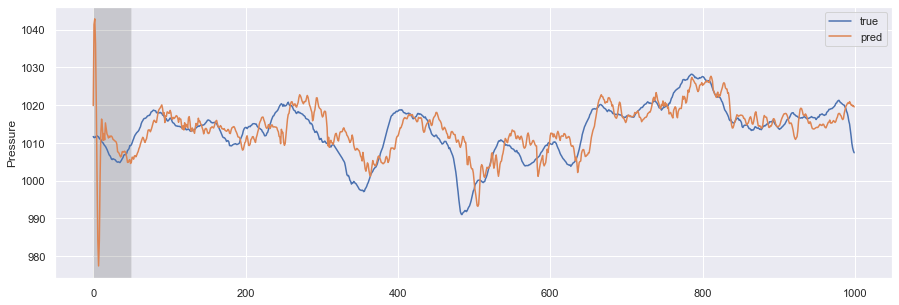

In [76]:
plot_comparison(start_idx=200, length=1000, train=False)